In [2]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 12 Jul 2018

Distributed under the terms of the MIT License.

# Notebook for specific visualization of molecules using RDKIT and other functions

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import os
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors3D import NPR1, NPR2, PMI1, PMI2, PMI3
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Geometry import rdGeometry
from rdkit.Chem import PyMol
import py3Dmol
from ipywidgets import interact, interactive, fixed
from rdkit import Geometry
import tempfile
import matplotlib.pyplot as plt
%aimport rdkit_functions
%aimport ellipsoid

In [4]:
# molecule file dir
molecule_file = '/home/atarzia/psp/linBmolecules/linbmolecules.txt'
# output dir
output_dir = '/home/atarzia/psp/linBmolecules/'

In [5]:
df, molecules, diameters = rdkit_functions.read_mol_txt_file(molecule_file)
rdkit_functions.produce_quick_fig_mol(molecules, output_dir+'molecules.pdf')

/home/atarzia/psp/linBmolecules/molecules_1.pdf
/home/atarzia/psp/linBmolecules/molecules_2.pdf


##  visualize all conformers of a molecule

In [5]:
def drawit(m, p, confId=-1):
    mb = Chem.MolToMolBlock(m, confId=confId)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()


def drawit2(m, p, confId=-1):
    mb = Chem.MolToMolBlock(m, confId=confId)
    p.addModel(mb, 'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()

In [6]:
molecules = {'n-hexane': 'N#C[Fe-4](C#N)(C#N)(C#N)(C#N)C#N'}

In [7]:
for name, smile in molecules.items():
    # if name != 'MIM':
    #     continue
    m = Chem.MolFromSmiles(smile)
    m = Chem.AddHs(m)
    Chem.EmbedMultipleConfs(m, numConfs=10, randomSeed=0xf00d, 
                            useExpTorsionAnglePrefs=True,
                            useBasicKnowledge=True)
    p = py3Dmol.view(width=400,height=400)
    interact(drawit, m=fixed(m),p=fixed(p),confId=(0,m.GetNumConformers()-1))

RDKit ERROR: [15:31:34] UFFTYPER: Unrecognized hybridization for atom: 2
RDKit ERROR: [15:31:34] UFFTYPER: Unrecognized atom type: Fe (2)


ValueError: value must be between min and max (min=0, value=-1, max=-1)

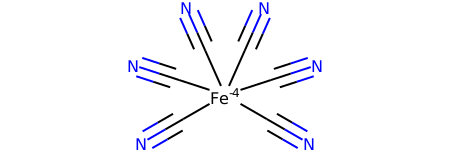

In [8]:
m

In [9]:
for name, smile in molecules.items():
    # if name != '1,9-dichlorononane':
    #     continue
    m = Chem.MolFromSmiles(smile)
    m = Chem.AddHs(m)
    Chem.EmbedMultipleConfs(m, numConfs=10, randomSeed=0xf00d, 
                            useExpTorsionAnglePrefs=True,
                            useBasicKnowledge=True)
    p = py3Dmol.view(width=400,height=400)
    for confId in range(10):
        drawit2(m,p,confId)
    p.show()

RDKit ERROR: [15:31:57] UFFTYPER: Unrecognized hybridization for atom: 2
RDKit ERROR: [15:31:57] UFFTYPER: Unrecognized atom type: Fe (2)


ValueError: Bad Conformer Id

## visualise the ellipsoid around a desired molecule

In [9]:
name = 'Urea'
smiles = 'C(=O)(N)N'
molecules = {name: smiles}
diameters = {name: 0}
output_dir = '/home/atarzia/psp/documents/images/'

In [10]:
m = Chem.MolFromSmiles(smiles)
m = Chem.AddHs(m)
Chem.EmbedMultipleConfs(m, numConfs=10, randomSeed=0xf00d, 
                        useExpTorsionAnglePrefs=True,
                        useBasicKnowledge=True)
p = py3Dmol.view(width=400,height=400)
for confId in range(10):
    drawit2(m,p,confId)
p.show()

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

molecule: Urea : SMILES: C(=O)(N)N


<IPython.core.display.Javascript object>


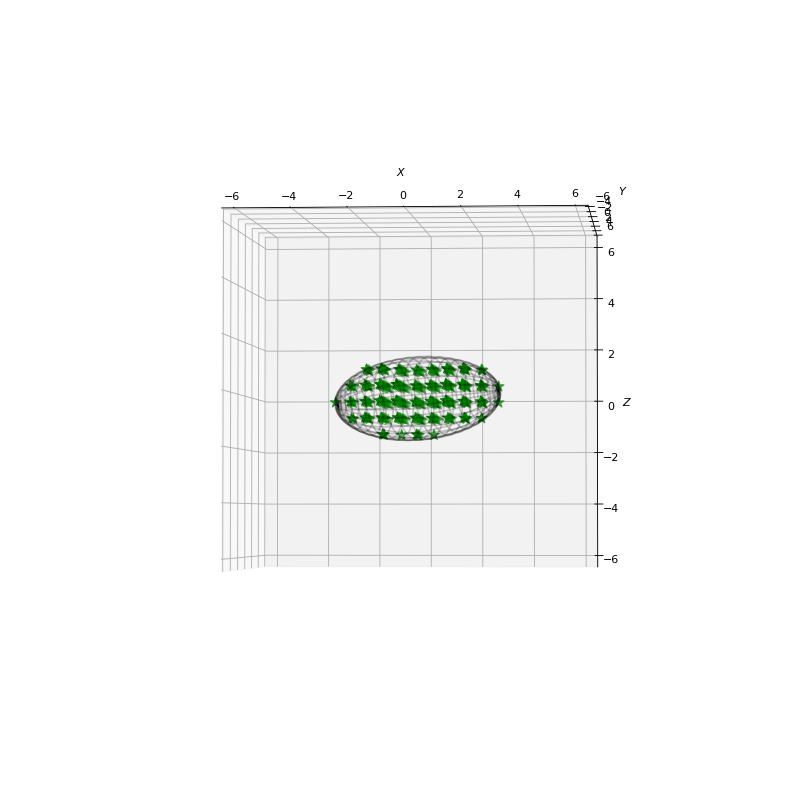

save fig?
1 out of 1 done


,confId,diam1,diam2,diam3,ratio_1,ratio_2
0,0,3.080662,5.49859,6.185282,0.451836,0.548164


In [11]:
rdkit_functions.calc_molecule_diameters(molecules, diameters, 
                                        out_dir=output_dir, vdwScale=0.8, boxMargin=4.0,
                                        spacing=0.6, show_vdw=False, plot_ellip=True,
                                        N_conformers=1, 
                                        show_conf=False)

## Visualize a random subset of molecules in molecule database

In [53]:
import molecule as mol
from molecule import molecule
import numpy as np
import random
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [46]:
mol_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'

In [49]:
mol_list = [i for i in mol.yield_molecules(directory=mol_db_dir)]

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7099.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4366.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1350.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3249.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9746.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2772.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_455.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8197.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_780.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9840.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5103.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9416.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1071.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1145.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3064.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3675.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5998.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9176.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7763

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1967.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2687.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_615.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5781.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5381.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9409.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8314.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8939.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8650.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10165.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9783.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1554.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8424.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_587.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1651.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8051.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5681.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4823.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_665

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_829.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7161.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8428.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_59.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_773.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1791.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7701.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1291.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6245.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_745.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1873.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9777.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_77.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4824.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6450.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8259.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7466.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4933.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1856.pkl


/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9154.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5057.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5309.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8124.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6801.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4671.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5313.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3855.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8781.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_317.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2973.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8129.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5329.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8584.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_332.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7093.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8786.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8901.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_857.

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3607.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6862.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7402.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10367.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8685.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9407.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9504.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1616.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6428.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3828.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9661.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10145.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2122.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_862.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3990.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2076.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8136.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6201.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_949.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1601.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6641.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9587.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1929.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7462.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1812.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8244.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8335.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2093.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7404.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5627.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10141.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5740.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4404.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1260.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1245.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7925.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_88

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9596.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2211.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8571.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4934.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1512.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4739.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4234.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_87.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2423.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9278.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5296.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9312.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9448.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7121.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3854.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9038.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8466.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2912.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3662

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5481.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7069.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7561.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3876.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8019.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9967.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4926.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7261.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3473.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3210.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2062.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2763.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4710.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10349.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1834.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_985.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_54.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9992.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8194

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9069.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7551.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1475.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4033.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4256.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6157.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4797.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3429.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1243.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9267.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8778.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9104.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8728.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6751.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4645.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3842.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7798.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10382.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7412.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2523.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_707.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6314.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_112.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8298.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1655.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1014.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6907.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7080.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7060.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6197.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_4619.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2822.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_527.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10070.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2314.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10099.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_584

/home/atarzia/psp/molecule_DBs/atarzia/ATRS_10027.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2905.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3963.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_5882.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7173.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_2269.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3235.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3527.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1276.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_3821.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_8414.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_1342.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7064.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9846.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6099.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_9963.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6434.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_6503.pkl
/home/atarzia/psp/molecule_DBs/atarzia/ATRS_7

5-amino-6-(5-phospho-beta-D-ribosylamino)uracil
KEGG
['KEGG', 'BRENDA']
no pubchemID
18337
Nc1c(NC2OC(COP(=O)(O)O)C(O)C2O)[nH]c(=O)[nH]c1=O
L-fuconate
BKMS
['BKMS', 'KEGG', 'BRENDA', 'SABIO']
no pubchemID
21291
C[C@H](O)[C@@H](O)[C@@H](O)[C@H](O)C(=O)[O-]
(+)-beta-pinene
BKMS
['BKMS', 'BRENDA']
no pubchemID
50026
C=C1CC[C@@H]2C[C@H]1C2(C)C
trans-4-Carboxymethylenebut-2-en-4-olide
SABIO
['SABIO']
no pubchemID
38107
O=C(O)/C=C1/C=CC(=O)O1
3-bromobenzonitrile
BRENDA
['BRENDA']
no pubchemID
no CHEBIID
C1=CC(=CC(=C1)Br)C#N
glucobrassicin
BKMS
['BKMS']
no pubchemID
29028
O=S(=O)(O)ON=C(Cc1c[nH]c2ccccc12)S[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
Sialyllactose
SABIO
['SABIO', 'BRENDA']
no pubchemID

CC(=O)NC1C(CC(OC1C(C(CO)O)O)(C(=O)O)OC2C(C(OC(C2O)OC(C(CO)O)C(C(C=O)O)O)CO)O)O
4-nitrophenyl phosphate(2-)
BRENDA
['BRENDA']
no pubchemID
61146
[O-][N+](=O)c1ccc(OP([O-])([O-])=O)cc1
deuteroporphyrin IX
BRENDA
['BRENDA']
no pubchemID
no CHEBIID
CC1=CC2=CC3=C(C=C(N3)C=C4C(=C(C(=N4)C=C5C(=C(C(=N5)C=

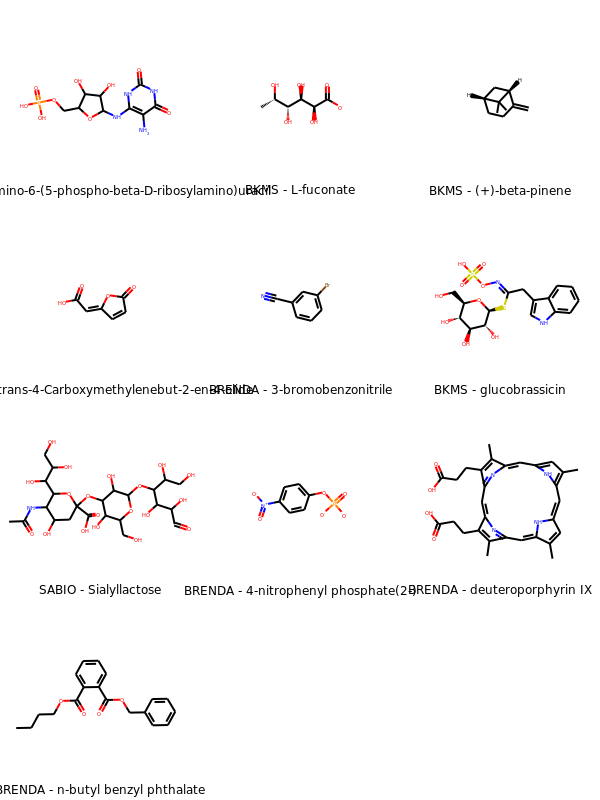

In [57]:
smiles_list = []
n_list = []
for ch in np.arange(10):
    m = random.choice(mol_list)
    print(m.name)
    n_list.append(m.DB+' - '+m.name)
    print(m.DB)
    print(m.DB_list)
    try:
        print(m.PubchemId)
    except AttributeError:
        print('no pubchemID')
    try:
        print(m.chebiID)
    except AttributeError:
        print('no CHEBIID')
    try:
        print(m.SMILES)
        smiles_list.append(m.SMILES)
    except AttributeError:
        print('no SMILES')
    
    #input('done')
    
m_list = [Chem.MolFromSmiles(i) for i in smiles_list]
Draw.MolsToGridImage(m_list, legends=n_list)

##  Random Code

In [ ]:
If you want all possible names for a molecule (from the SMILES string) using Python:

>>> from cinfony import webel, pybel
>>> mol = pybel.readstring("smi", "C(=O)C=C")
>>> name = webel.Molecule(mol).write("names")
>>> print(name)

['prop-2-enal', 'Acrolein', ..